In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv("./player_combined_2021_2022.csv")

In [73]:
data = data.drop(columns=["Unnamed: 0", "Born", "Nation", "Squad"])

In [74]:
data.isnull().sum()

Player                0
Pos                   1
Comp                  0
Age                   0
90s                   0
                   ... 
OG                    0
recovered_balls       2
Aerial_duel_won       2
Aerial_duel_lost      2
Aerial_duel_won%    225
Length: 133, dtype: int64

In [75]:
data.columns[:10]

Index(['Player', 'Pos', 'Comp', 'Age', '90s', 'Tkl', 'TklWon', 'Tkl_Def_3rd',
       'Tkl_Mid_3rd', 'Tkl_Att_3rd'],
      dtype='object')

In [76]:
data["Comp"].unique()

array(['eng Premier League', 'fr Ligue 1', 'de Bundesliga', 'it Serie A',
       'es La Liga'], dtype=object)

In [77]:
data.shape

(2916, 133)

In [78]:
data["Pos"].value_counts().sum()

2915

In [79]:
data = data.dropna()

In [80]:
unique_values = data["Comp"].unique()

In [81]:
value_to_int_comp = {value: index for index, value in enumerate(unique_values)}

In [82]:
value_to_int_comp

{'eng Premier League': 0,
 'fr Ligue 1': 1,
 'de Bundesliga': 2,
 'it Serie A': 3,
 'es La Liga': 4}

In [83]:
data['Comp'] = data['Comp'].map(value_to_int_comp)

In [84]:
data

,Player,Pos,Comp,Age,90s,Tkl,TklWon,Tkl_Def_3rd,Tkl_Mid_3rd,Tkl_Att_3rd,...,Foul_drawn,Offsides,Tackles_to_win_possession,PKwon,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%
0,Max Aarons,DF,0,21,32.0,64.0,44,49.0,15.0,0.0,...,52,1,44,0.0,2.0,1,154.0,13.0,50.0,20.6
1,Yunis Abdelhamid,DF,1,33,33.1,48.0,27,34.0,14.0,0.0,...,25,0,27,0.0,1.0,0,195.0,62.0,38.0,62.0
2,Salis Abdul Samed,MF,1,21,27.4,43.0,23,25.0,16.0,2.0,...,37,0,23,0.0,0.0,0,186.0,17.0,20.0,45.9
3,Laurent Abergel,MF,1,28,32.8,110.0,60,44.0,53.0,13.0,...,69,1,60,0.0,0.0,0,264.0,11.0,7.0,61.1
5,Dickson Abiama,FW,2,22,8.1,11.0,7,4.0,5.0,2.0,...,11,15,7,0.0,0.0,0,28.0,19.0,30.0,38.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,MF,4,22,28.8,52.0,25,19.0,30.0,3.0,...,21,3,25,0.0,0.0,0,139.0,63.0,24.0,72.4
2912,Szymon Żurkowski,MF,3,23,25.6,58.0,33,24.0,21.0,13.0,...,67,0,33,0.0,1.0,0,162.0,24.0,32.0,42.9
2913,Martin Ødegaard,"MF,FW",0,22,30.9,49.0,21,6.0,24.0,19.0,...,20,3,21,0.0,2.0,0,162.0,14.0,23.0,37.8
2914,Milan Đurić,FW,3,31,24.1,1.0,1,0.0,1.0,0.0,...,45,6,1,1.0,0.0,0,40.0,242.0,83.0,74.5


In [85]:
unique_values = data["Pos"].unique()

In [86]:
value_to_int_pos = {value: index for index, value in enumerate(unique_values)}

In [87]:
value_to_int_pos

{'DF': 0,
 'MF': 1,
 'FW': 2,
 'MF,FW': 3,
 'FW,MF': 4,
 'DF,MF': 5,
 'DF,FW': 6,
 'FW,DF': 7,
 'MF,DF': 8,
 'GK': 9}

In [88]:
data['Pos'] = data['Pos'].map(value_to_int_pos)

In [89]:
from sklearn.cluster import KMeans

In [90]:
kmeans = KMeans(n_clusters=8)

In [91]:
kmeans.fit(data.iloc[:,1:])

KMeans()

In [92]:
data["cluster_number"] = kmeans.fit_predict(data.iloc[:,1:])

In [93]:
data

,Player,Pos,Comp,Age,90s,Tkl,TklWon,Tkl_Def_3rd,Tkl_Mid_3rd,Tkl_Att_3rd,...,Offsides,Tackles_to_win_possession,PKwon,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%,cluster_number
0,Max Aarons,0,0,21,32.0,64.0,44,49.0,15.0,0.0,...,1,44,0.0,2.0,1,154.0,13.0,50.0,20.6,1
1,Yunis Abdelhamid,0,1,33,33.1,48.0,27,34.0,14.0,0.0,...,0,27,0.0,1.0,0,195.0,62.0,38.0,62.0,6
2,Salis Abdul Samed,1,1,21,27.4,43.0,23,25.0,16.0,2.0,...,0,23,0.0,0.0,0,186.0,17.0,20.0,45.9,6
3,Laurent Abergel,1,1,28,32.8,110.0,60,44.0,53.0,13.0,...,1,60,0.0,0.0,0,264.0,11.0,7.0,61.1,6
5,Dickson Abiama,2,2,22,8.1,11.0,7,4.0,5.0,2.0,...,15,7,0.0,0.0,0,28.0,19.0,30.0,38.8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,1,4,22,28.8,52.0,25,19.0,30.0,3.0,...,3,25,0.0,0.0,0,139.0,63.0,24.0,72.4,1
2912,Szymon Żurkowski,1,3,23,25.6,58.0,33,24.0,21.0,13.0,...,0,33,0.0,1.0,0,162.0,24.0,32.0,42.9,7
2913,Martin Ødegaard,3,0,22,30.9,49.0,21,6.0,24.0,19.0,...,3,21,0.0,2.0,0,162.0,14.0,23.0,37.8,6
2914,Milan Đurić,2,3,31,24.1,1.0,1,0.0,1.0,0.0,...,6,1,1.0,0.0,0,40.0,242.0,83.0,74.5,0


In [94]:
data["Pos"].value_counts()

Pos
0    580
1    432
2    286
4    242
3    211
8     56
5     50
6     37
7     15
9      1
Name: count, dtype: int64

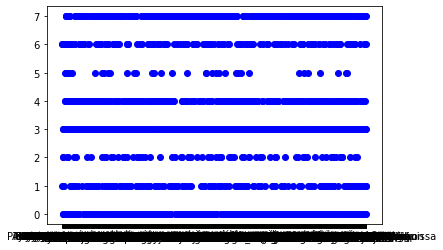

In [95]:
plt.scatter(data["Player"], data["cluster_number"], color='blue', marker='o')

In [96]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
cluster_centroids = kmeans.cluster_centers_

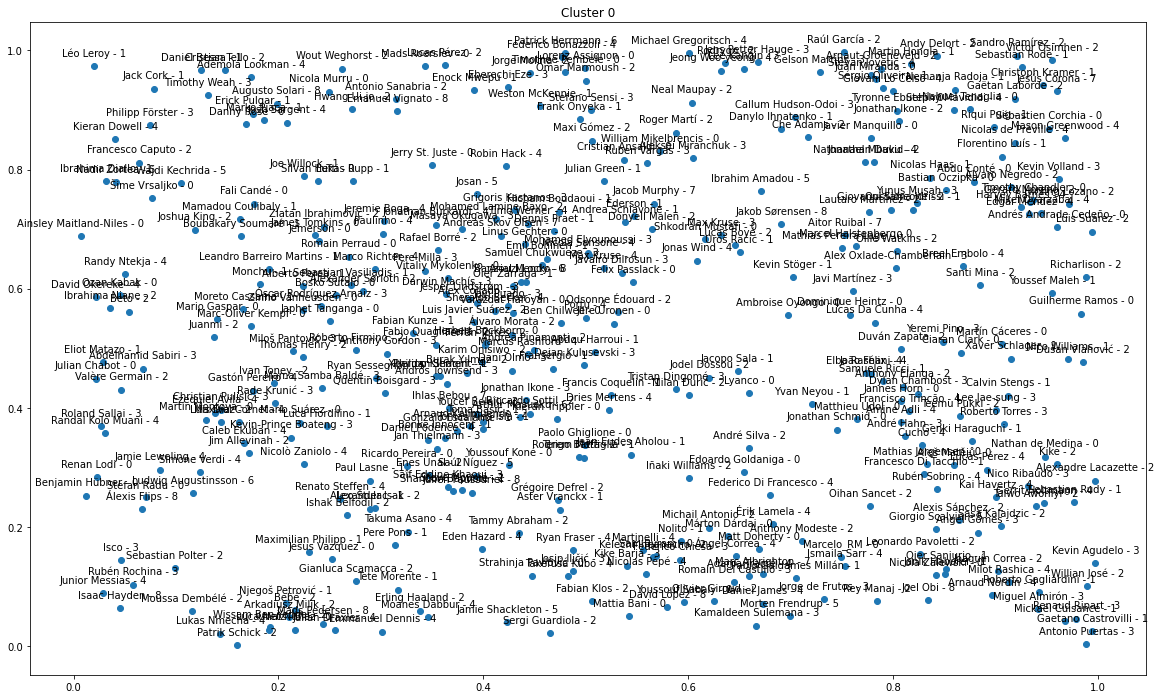

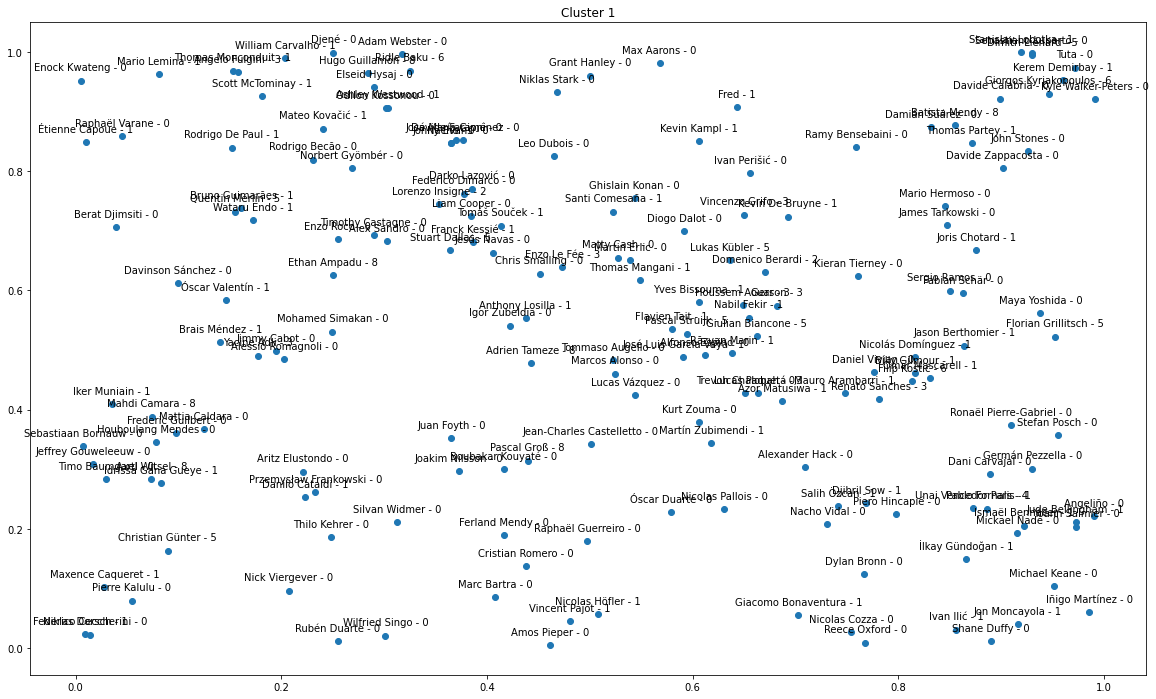

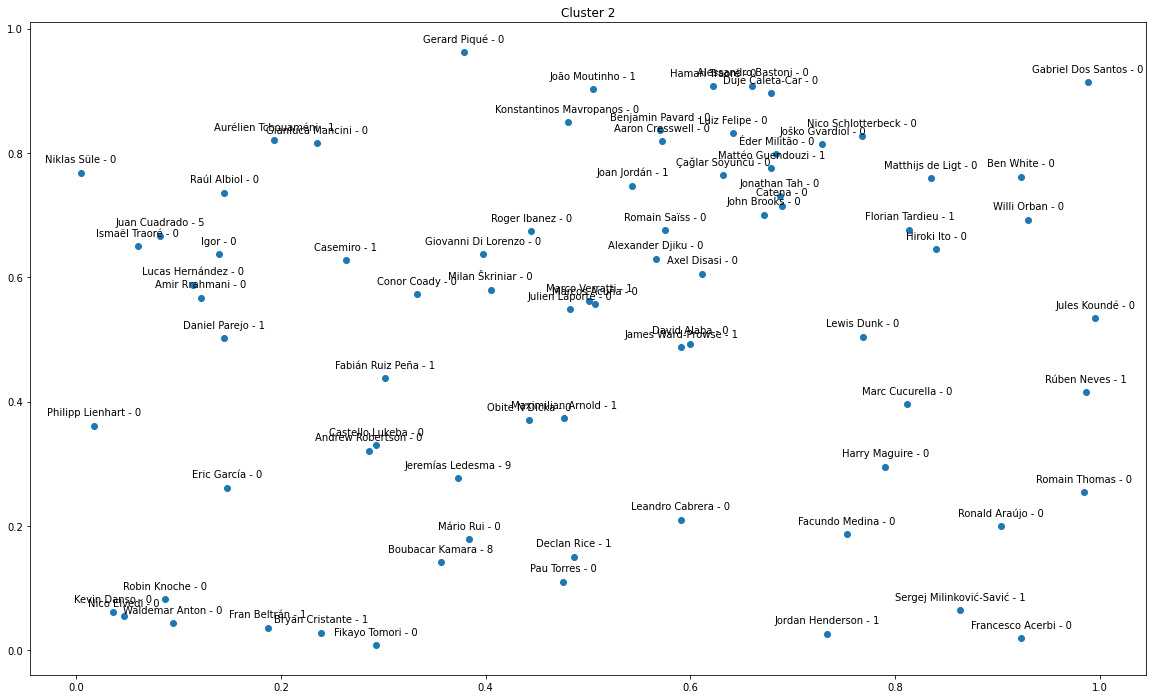

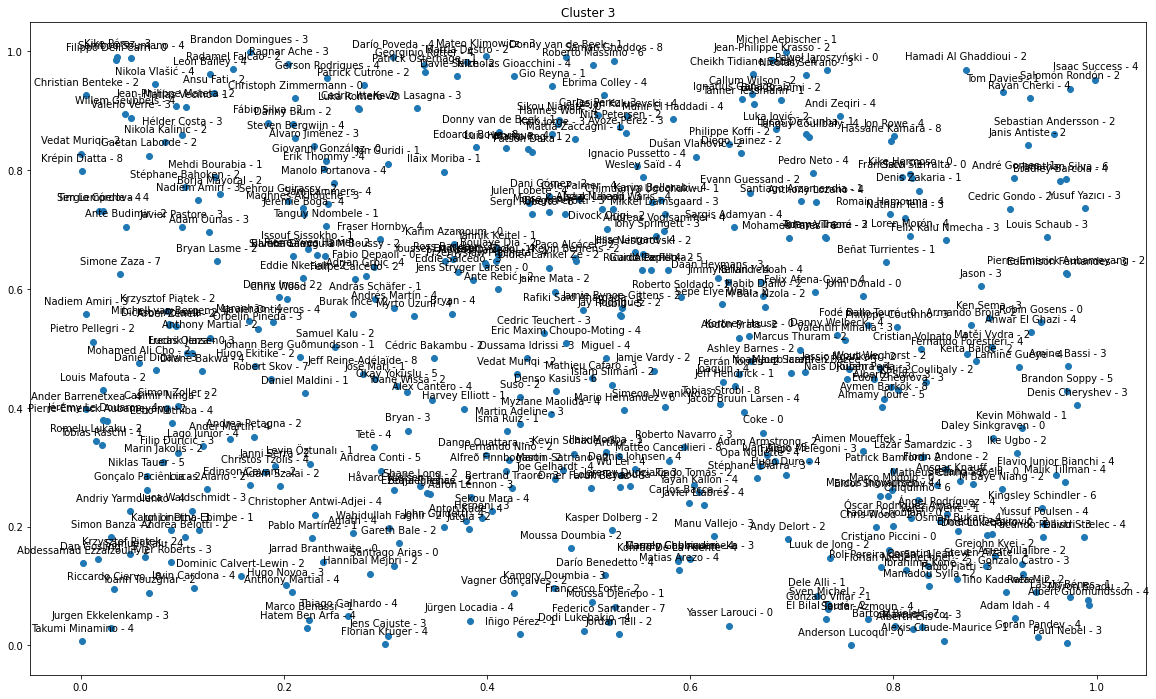

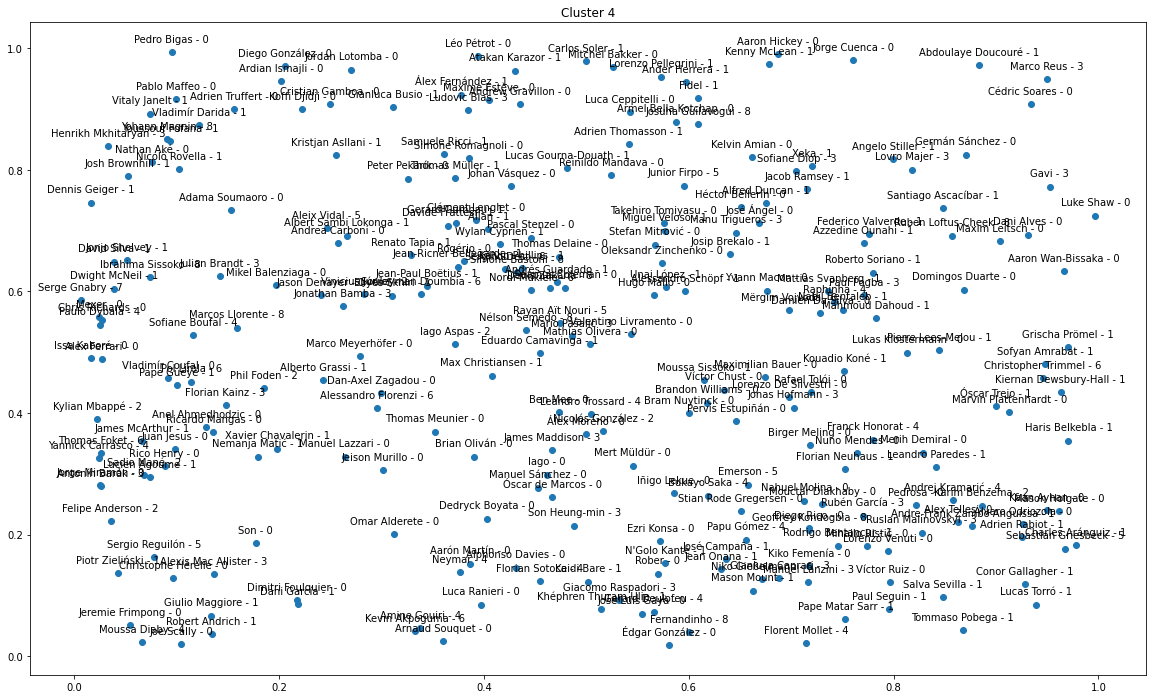

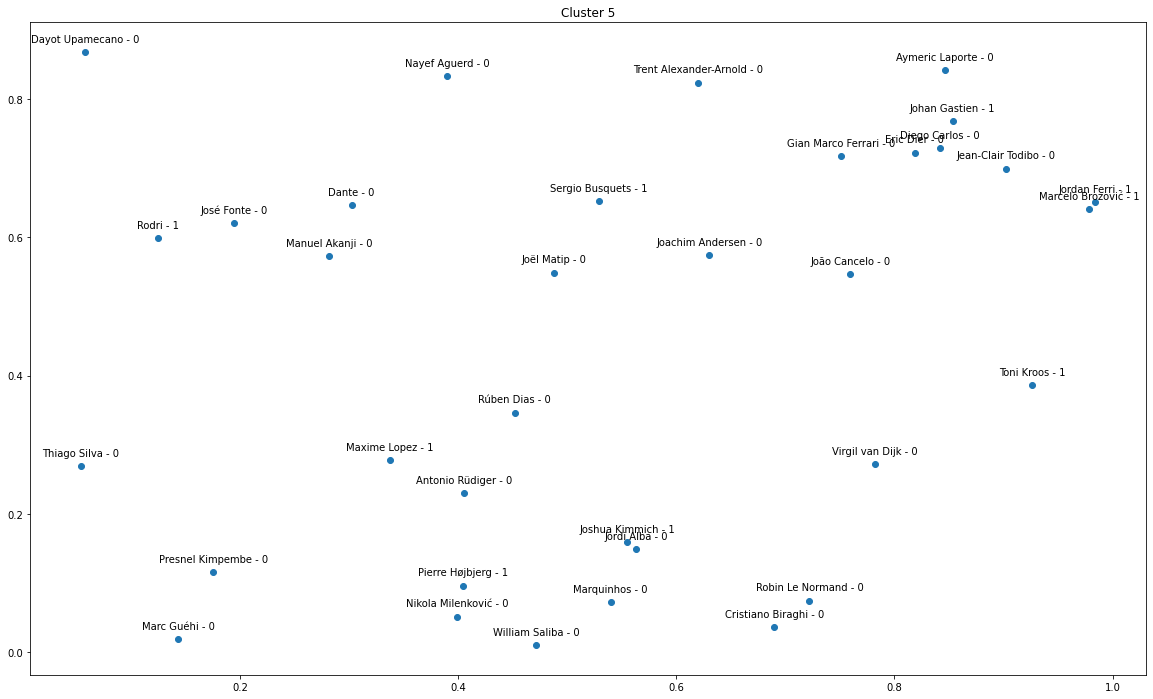

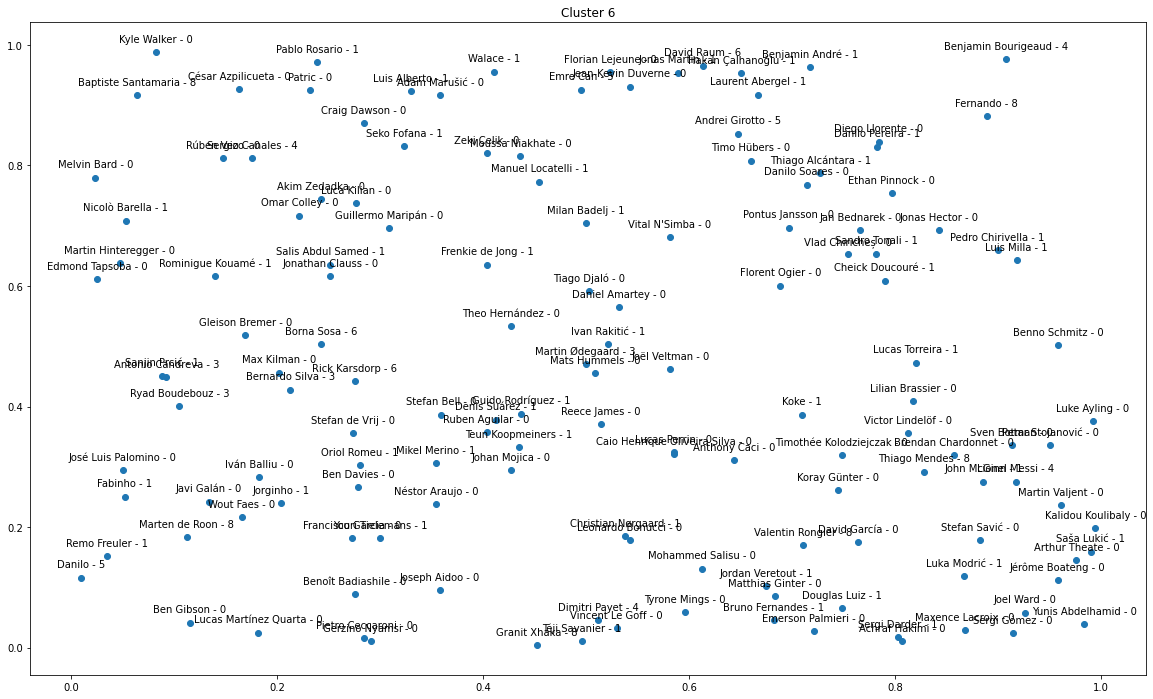

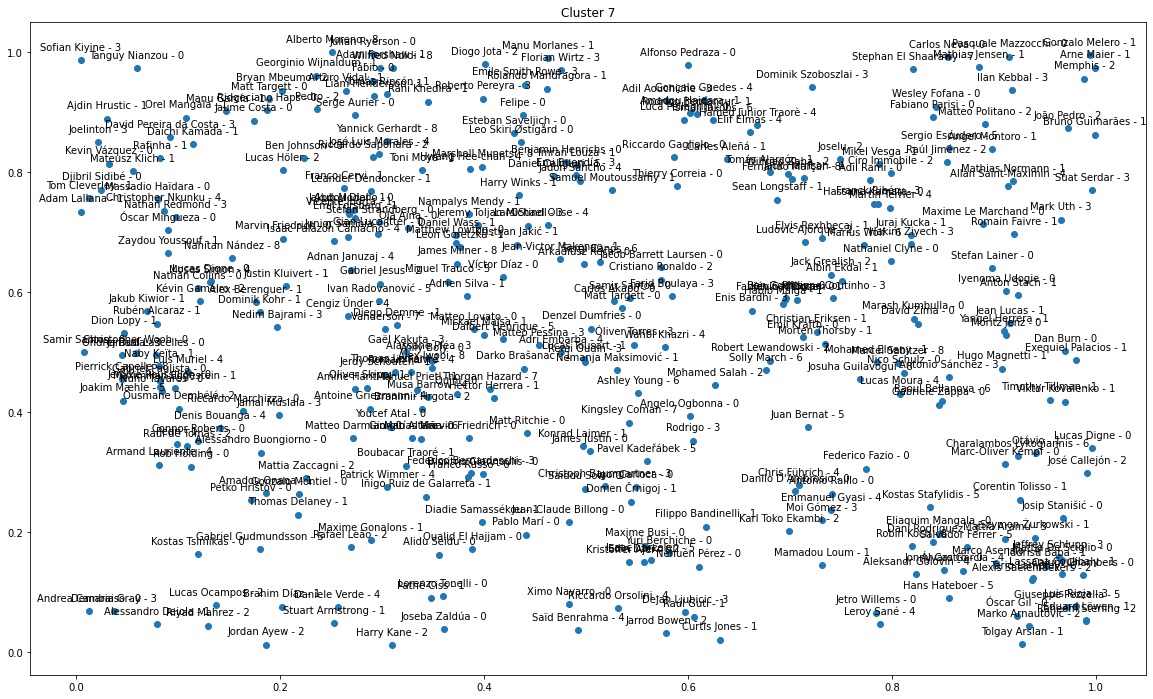

In [100]:
for i in range(len(data["cluster_number"].unique())):
    val = data[data["cluster_number"] == i]
    val["x"] = np.random.random((val.shape[0]))
    val["y"] = np.random.random((val.shape[0]))
    plt.figure(figsize=(20, 12))
    plt.title(f"Cluster {i}")
    plt.scatter(val["x"], val["y"])
    # Annotate the points with the player names
    for _, row in val.iterrows():
        annotation = f"{row['Player']} - {row['Pos']}"
        plt.annotate(annotation, (row["x"], row["y"]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.show()

In [52]:
val

,Player,Pos,Comp,Age,90s,Tkl,TklWon,Tkl_Def_3rd,Tkl_Mid_3rd,Tkl_Att_3rd,...,PKwon,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%,cluster_number,x,y
1,Yunis Abdelhamid,0,1,33,33.1,48.0,27,34.0,14.0,0.0,...,0.0,1.0,0,195.0,62.0,38.0,62.0,4,0.813525,0.709495
2,Salis Abdul Samed,1,1,21,27.4,43.0,23,25.0,16.0,2.0,...,0.0,0.0,0,186.0,17.0,20.0,45.9,4,0.785296,0.439335
3,Laurent Abergel,1,1,28,32.8,110.0,60,44.0,53.0,13.0,...,0.0,0.0,0,264.0,11.0,7.0,61.1,4,0.797131,0.340173
27,Ruben Aguilar,0,1,28,23.8,78.0,53,39.0,32.0,7.0,...,0.0,0.0,1,157.0,33.0,40.0,45.2,4,0.320906,0.524296
32,Joseph Aidoo,0,4,25,29.3,39.0,26,28.0,10.0,1.0,...,0.0,0.0,1,164.0,62.0,47.0,56.9,4,0.461568,0.042057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,Axel Witsel,8,2,32,21.6,42.0,27,12.0,23.0,7.0,...,0.0,2.0,0,152.0,31.0,15.0,67.4,4,0.542546,0.364677
2859,Granit Xhaka,8,0,28,25.9,32.0,18,16.0,12.0,4.0,...,0.0,1.0,0,146.0,27.0,29.0,48.2,4,0.158680,0.210121
2890,Akim Zedadka,0,1,26,37.1,72.0,44,34.0,29.0,9.0,...,0.0,1.0,0,232.0,28.0,26.0,51.9,4,0.582311,0.684426
2911,Martín Zubimendi,1,4,22,28.8,52.0,25,19.0,30.0,3.0,...,0.0,0.0,0,139.0,63.0,24.0,72.4,4,0.811756,0.579957
